<a href="https://colab.research.google.com/github/AlmalkiHub/01_the_machine_learning_landscape/blob/main/01_the_machine_learning_landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Ali Almalki`

In [1]:
# Import required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.linear_model

In [2]:
# Download datasets 
!wget https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/gdp_per_capita.csv
!wget https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/oecd_bli_2015.csv

--2022-08-12 20:48:43--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/gdp_per_capita.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36323 (35K) [text/plain]
Saving to: ‘gdp_per_capita.csv’

gdp_per_capita.csv  100%[===================>]  35.47K  --.-KB/s    in 0.006s  

2022-08-12 20:48:43 (5.69 MB/s) - ‘gdp_per_capita.csv’ saved [36323/36323]

--2022-08-12 20:48:43--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/oecd_bli_2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response...

In [16]:
# Read the data 
oecd_df = pd.read_csv("/content/oecd_bli_2015.csv", thousands=",")
gdp_df = pd.read_csv("/content/gdp_per_capita.csv", thousands=",", delimiter="\t", encoding="latin1", na_values="n/a")



In [17]:
# Check the data shape 
print(f"OCED_BLI_2015 Dataset Shape is: {oecd_df.shape}")
print(f"OCED_BLI_2015 Dataset Columns are: {oecd_df.columns}")
print(f"GDP_PER_CAPITA Dataset Shape is: {gdp_df.shape}")
print(f"GDP_PER_CAPITA Dataset Columns are: {gdp_df.columns}")

OCED_BLI_2015 Dataset Shape is: (3292, 17)
OCED_BLI_2015 Dataset Columns are: Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')
GDP_PER_CAPITA Dataset Shape is: (190, 7)
GDP_PER_CAPITA Dataset Columns are: Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')


In [18]:
oecd_df.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [19]:
gdp_df.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [20]:
# Write a function to prepare the data 

def prepare_country_stats(oecd_df, gdp_df):
    oecd_df = oecd_df[oecd_df["INEQUALITY"]=="TOT"]
    oecd_df = oecd_df.pivot(index="Country", columns="Indicator", values="Value")
    gdp_df.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_df.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_df, right=gdp_df,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [21]:
# Prepare the data 
country_stats = prepare_country_stats(oecd_df, gdp_df)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


In [26]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [27]:
country_stats.shape

(29, 2)

In [39]:
country_stats.index.unique()

Index(['Russia', 'Turkey', 'Hungary', 'Poland', 'Slovak Republic', 'Estonia',
       'Greece', 'Portugal', 'Slovenia', 'Spain', 'Korea', 'Italy', 'Japan',
       'Israel', 'New Zealand', 'France', 'Belgium', 'Germany', 'Finland',
       'Canada', 'Netherlands', 'Austria', 'United Kingdom', 'Sweden',
       'Iceland', 'Australia', 'Ireland', 'Denmark', 'United States'],
      dtype='object', name='Country')

In [22]:
X.shape, y.shape

((29, 1), (29, 1))

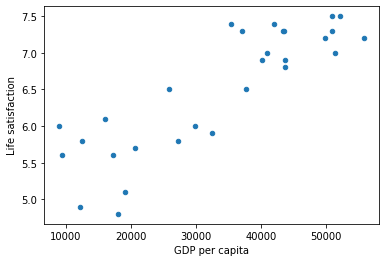

In [29]:
# Visualize the data 
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

### Modelling Part

In [30]:
# Select a linear model 
model = sklearn.linear_model.LinearRegression()


In [31]:
model

LinearRegression()

In [32]:
# Train the model 
model.fit(X, y)

LinearRegression()

In [40]:
# Make a prediction for Saudi Arabia Life Satisfaction based on its GDP per capita 
X_new = [[20110]] # Saudi Arabia's GDP per capita 
print(f"Model Prediction for Saudi Arabia Life Satisfaction based on its GDP per capita is: {model.predict(X_new)}")


Model Prediction for Saudi Arabia Life Satisfaction based on its GDP per capita is: [[5.84076442]]


### References: 
* [Hands-On
Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition,
by Aurélien Géron (O’Reilly)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)